In [14]:
import zipfile
import pandas as pd

zip_path = r"C:\Users\Alyaa\Downloads\heart+disease.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    # extracting only the processed.cleveland.data file
    z.extract("processed.cleveland.data", r"C:\Users\Alyaa\Downloads")

# loading the data
data_path = r"C:\Users\Alyaa\Downloads\processed.cleveland.data"
heart_disease = pd.read_csv(data_path, header=None)
print(heart_disease.head())


     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [2]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "target"
]

heart_disease.columns = columns
print(heart_disease.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [3]:
import numpy as np
heart_disease.replace("?", np.nan, inplace=True)




In [4]:
print(heart_disease.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [5]:
heart_disease = heart_disease.dropna()

In [6]:
for col in heart_disease.columns:
    print(col, heart_disease[col].unique())


age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex [1. 0.]
cp [1. 4. 3. 2.]
trestbps [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 56

In [7]:
import pandas as pd
# Apply one-hot encoding on categorical columns
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

heart_disease_encoded = pd.get_dummies(heart_disease, columns=categorical_cols, drop_first=True)

print(heart_disease_encoded.head())


    age  trestbps   chol  thalach  oldpeak  target  sex_1.0  cp_2.0  cp_3.0  \
0  63.0     145.0  233.0    150.0      2.3       0     True   False   False   
1  67.0     160.0  286.0    108.0      1.5       2     True   False   False   
2  67.0     120.0  229.0    129.0      2.6       1     True   False   False   
3  37.0     130.0  250.0    187.0      3.5       0     True   False    True   
4  41.0     130.0  204.0    172.0      1.4       0    False    True   False   

   cp_4.0  ...  restecg_1.0  restecg_2.0  exang_1.0  slope_2.0  slope_3.0  \
0   False  ...        False         True      False      False       True   
1    True  ...        False         True       True       True      False   
2    True  ...        False         True       True       True      False   
3   False  ...        False        False      False      False       True   
4   False  ...        False         True      False      False      False   

   ca_1.0  ca_2.0  ca_3.0  thal_6.0  thal_7.0  
0   False   Fa

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose which numerical columns to scale (exclude encoded ones)
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Using StandardScaler
scaler = StandardScaler()
heart_disease_encoded[numerical_cols] = scaler.fit_transform(heart_disease_encoded[numerical_cols])

# OR, if you want MinMaxScaler
# scaler = MinMaxScaler()
# heart_disease_encoded[numerical_cols] = scaler.fit_transform(heart_disease_encoded[numerical_cols])

print(heart_disease_encoded.head())


        age  trestbps      chol   thalach   oldpeak  target  sex_1.0  cp_2.0  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965       0     True   False   
1  1.378929  1.596266  0.744555 -1.816334  0.381773       2     True   False   
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662       1     True   False   
3 -1.941680 -0.095506  0.051047  1.633010  2.099753       0     True   False   
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874       0    False    True   

   cp_3.0  cp_4.0  ...  restecg_1.0  restecg_2.0  exang_1.0  slope_2.0  \
0   False   False  ...        False         True      False      False   
1   False    True  ...        False         True       True       True   
2   False    True  ...        False         True       True       True   
3    True   False  ...        False        False      False      False   
4   False   False  ...        False         True      False      False   

   slope_3.0  ca_1.0  ca_2.0  ca_3.0  thal_6.0  thal_7.0  
0       True   

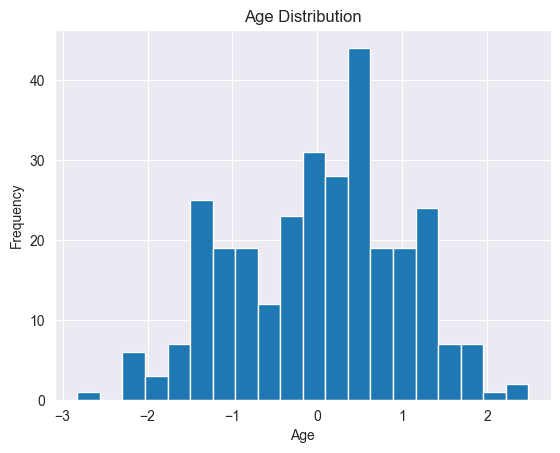

In [9]:
import matplotlib.pyplot as plt

heart_disease_encoded["age"].hist(bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


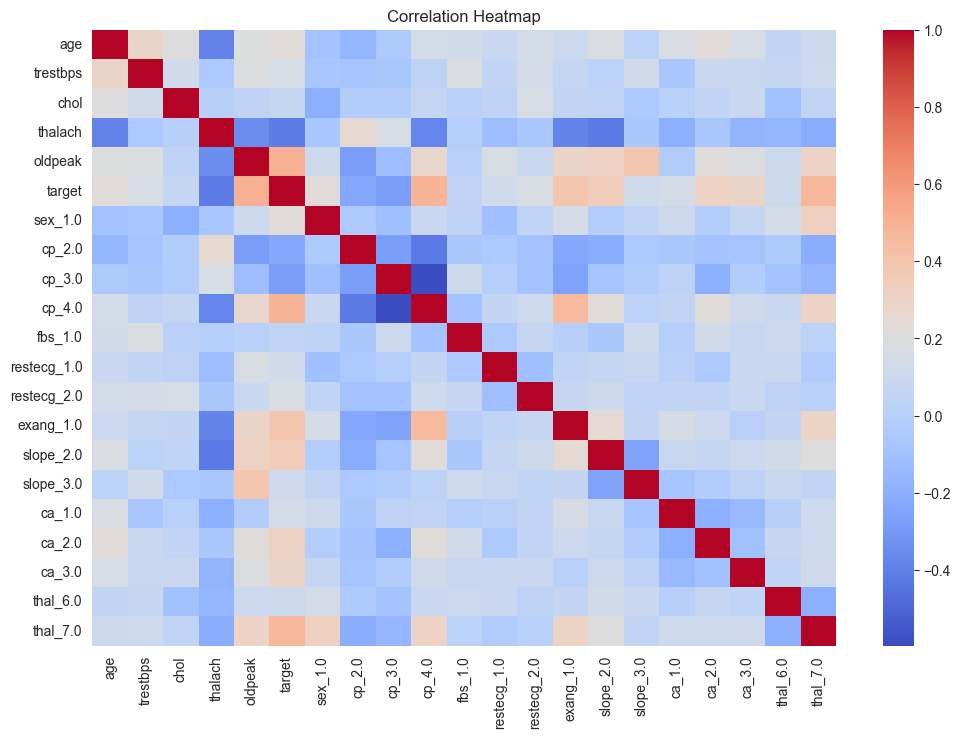

In [10]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(heart_disease_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


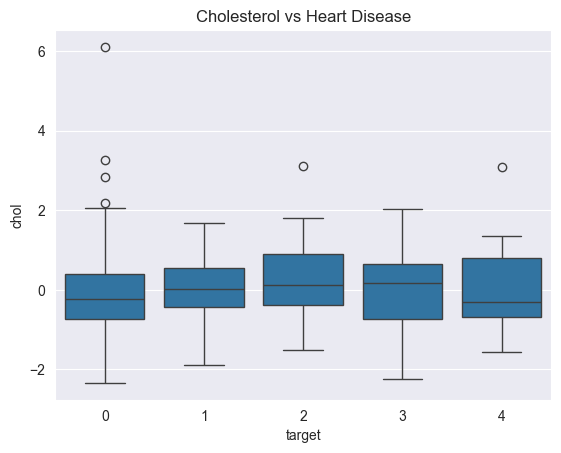

In [11]:
sns.boxplot(x="target", y="chol", data=heart_disease_encoded)
plt.title("Cholesterol vs Heart Disease")
plt.show()


In [12]:
heart_disease_encoded.to_csv("../data/heart_disease_cleaned.csv", index=False)


In [13]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
